
### **train.ipynb**



## **Step 0: Data Preparation and Mask Augmentation**

In [ ]:
# Mount Google Drive to access dataset and save outputs

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Navigate to working directory where data.zip is stored

cd '/content/gdrive/MyDrive/detect_mask'

/content/gdrive/MyDrive/detect_mask


In [ ]:
# Unzip the original face dataset (contains unmasked face images)
# This dataset will be used to generate masked images using MaskTheFace

!unzip data.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/not_wearing_mask/face5297.jpg  
  inflating: train/not_wearing_mask/face5298.jpg  
  inflating: train/not_wearing_mask/face5301.jpg  
  inflating: train/not_wearing_mask/face5302.jpg  
  inflating: train/not_wearing_mask/face5303.jpg  
  inflating: train/not_wearing_mask/face5304.jpg  
  inflating: train/not_wearing_mask/face5305.jpg  
  inflating: train/not_wearing_mask/face5306.jpg  
  inflating: train/not_wearing_mask/face5310.jpg  
  inflating: train/not_wearing_mask/face5313.jpg  
  inflating: train/not_wearing_mask/face5314.jpg  
  inflating: train/not_wearing_mask/face5315.jpg  
  inflating: train/not_wearing_mask/face5316.jpg  
  inflating: train/not_wearing_mask/face5319.jpg  
  inflating: train/not_wearing_mask/face5321.jpg  
  inflating: train/not_wearing_mask/face5322.jpg  
  inflating: train/not_wearing_mask/face5323.jpg  
  inflating: train/not_wearing_mask/face5326.jpg  
  inflating: train/not_wearing_mask/face5328.j

In [ ]:
# Clone the MaskTheFace repository (https://github.com/aqeelanwar/MaskTheFace)
# This tool is used to generate synthetic face images with different mask types

! git clone https://github.com/aqeelanwar/MaskTheFace.git

Cloning into 'MaskTheFace'...
remote: Enumerating objects: 3131, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 3131 (delta 4), reused 0 (delta 0), pack-reused 3122 (from 1)
Receiving objects: 100% (3131/3131), 235.03 MiB | 20.61 MiB/s, done.
Resolving deltas: 100% (254/254), done.


In [ ]:
# Install required Python packages
# These include facial detection libraries, WandB for visualization,
# and other dependencies required by MaskTheFace

! pip install scikit-learn
! pip install wandb
! pip install dlib
! pip install face-recognition
! pip install face-recognition-models
! pip install dotmap
! pip install Cython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566162 sha256=30fd9dd338a50b96a3a3c13c0b8cbf0d619001562e3e889bc4262114a902f300
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [ ]:
 cd 'MaskTheFace'

/content/gdrive/MyDrive/detect_mask/MaskTheFace


In [ ]:
# Print current working directory for confirmation

import os
os.getcwd()

'/content/gdrive/MyDrive/detect_mask/MaskTheFace'

In [ ]:
# Run mask_the_face.py to generate synthetic masked face images
# This applies synthetic masks (N95, KN95, surgical, cloth) to all faces
# in the specified directory of unmasked images

 ! python mask_the_face.py --path '/content/gdrive/MyDrive/detect_mask/train/not_wearing_mask' --code "N95, KN95, surgical, cloth"

--------------------------------------------------------------
----------------------- Get dlib model -----------------------
--------------------------------------------------------------
Zip file size:  61.07 MB
Saving dlib model...
Extracting dlib model...
Saved:  dlib_models/shape_predictor_68_face_landmarks.dat.bz2
--------------------------------------------------------------
---------------------------- done ----------------------------
--------------------------------------------------------------
 __  __           _ _______ _          ______
|  \/  |         | |__   __| |        |  ____|
| \  / | __ _ ___| | _| |  | |__   ___| |__ __ _  ___ ___
| |\/| |/ _` / __| |/ / |  | '_ \ / _ \  __/ _` |/ __/ _ \
| |  | | (_| \__ \   <| |  | | | |  __/ | | (_| | (_|  __/
|_|  |_|\__,_|___/_|\_\_|  |_| |_|\___|_|  \__,_|\___\___|
-------------------------------------------------------------
-------------------- Masking image files --------------------
-------------------------------------

In [ ]:
# Generate synthetic masked images for validation set
# This ensures that both training and validation datasets
# include faces with various types of masks (N95, KN95, surgical, cloth)

 ! python mask_the_face.py --path '/content/gdrive/MyDrive/detect_mask/val/not_wearing_mask' --code "N95, KN95, surgical, cloth"

 __  __           _ _______ _          ______
|  \/  |         | |__   __| |        |  ____|
| \  / | __ _ ___| | _| |  | |__   ___| |__ __ _  ___ ___
| |\/| |/ _` / __| |/ / |  | '_ \ / _ \  __/ _` |/ __/ _ \
| |  | | (_| \__ \   <| |  | | | |  __/ | | (_| | (_|  __/
|_|  |_|\__,_|___/_|\_\_|  |_| |_|\___|_|  \__,_|\___\___|
-------------------------------------------------------------
-------------------- Masking image files --------------------
-------------------------------------------------------------
100% 2000/2000 [01:50<00:00, 18.08it/s]
-------------------------------------------------------------
----------------- Masking image directories -----------------
-------------------------------------------------------------
0it [00:00, ?it/s]
Processing Done


## Step 1: Prepare Data for Training

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import numpy as np



In [ ]:
# Define image normalization parameters
# normalized


In [ ]:
# Define image preprocessing and augmentation pipeline for training set
train_transform = torchvision.transforms.Compose([
                                                  # augmentation here
                                                  transforms.CenterCrop(112),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize((0.5,), (1.0)),
                                                  transforms.RandomRotation(30)
])


# Define preprocessing for validation set (no augmentation)
val_transform = torchvision.transforms.Compose([
                                                transforms.CenterCrop(112),
                                                transforms.ToTensor(),
                                                transforms.Normalize((0.5,), (1.0)),
                                                transforms.RandomRotation(30)
])

train_path = "/content/gdrive/MyDrive/detect_mask/train"
val_path = "/content/gdrive/MyDrive/detect_mask/val"


In [ ]:
# Check if dataset directories exist to prevent runtime errors

import os
print(os.path.isdir(train_path))
print(os.path.isdir(val_path  ))

True
True


In [ ]:
# Remove unnecessary checkpoint directories created by Colab
!find /content/gdrive/MyDrive/detect_mask/train -type d -name ".ipynb_checkpoints" -exec rm -r {} +
!find /content/gdrive/MyDrive/detect_mask/val -type d -name ".ipynb_checkpoints" -exec rm -r {} +

# Define training and validation datasets using ImageFolder
train_data = torchvision.datasets.ImageFolder(root='/content/gdrive/MyDrive/detect_mask/train', transform=train_transform)

val_data = torchvision.datasets.ImageFolder('/content/gdrive/MyDrive/detect_mask/val', transform=val_transform)

# Print class-to-index mapping for both training and validation sets
print("Class mapping (train): ", train_data.class_to_idx)
print("Class mapping (val): ", val_data.class_to_idx)

# Print dataset size (number of images per set)
print("Number of training images: ", len(train_data))
print("Number of validation images: ", len(val_data))


Class mapping (train):  {'not_wearing_mask': 0, 'wearing_mask': 1}
Class mapping (val):  {'not_wearing_mask': 0, 'wearing_mask': 1}
Number of training images:  11902
Number of validation images:  3960


# **2. Prepare Model**

In [ ]:
# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [ ]:
# Import pre-trained models from torchvision
# We use ResNet-50 as the base model for binary classification
# The final fully connected layer will be modified later
import torchvision.models as models
from torchvision.models import resnet50

# data_loader
train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True, )
val_dataloader = DataLoader(val_data, batch_size=64, shuffle=False, )

In [ ]:
# Load the ResNet-50 model and send it to the selected device (GPU or CPU)
model = models.resnet50(pretrained=False).to(device)

# Optionally, set requires_grad=True for all layers
for param in model.parameters():
    param.requires_grad = True

# Modify the final fully connected layer for binary classification (2 classes: mask / no mask)
num = model.fc.in_features
model.fc = torch.nn.Sequential(
    torch.nn.Linear(num, 1),
    # torch.nn.ReLU(),
    # torch.nn.Dropout(p=0.5),
    # torch.nn.Sigmoid()
)

# Ensure the new fc layer is trainable
for param in model.fc.parameters():
    param.requires_grad = True


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


# **3. Training**


In [ ]:
# Import necessary libraries for training, evaluation, and logging

import torch
import wandb
import sklearn
from sklearn import metrics
import datetime
import os
from torch import optim
import torch.nn as nn

from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc

wandb.init

<function wandb.sdk.wandb_init.init(entity: 'str | None' = None, project: 'str | None' = None, dir: 'StrPath | None' = None, id: 'str | None' = None, name: 'str | None' = None, notes: 'str | None' = None, tags: 'Sequence[str] | None' = None, config: 'dict[str, Any] | str | None' = None, config_exclude_keys: 'list[str] | None' = None, config_include_keys: 'list[str] | None' = None, allow_val_change: 'bool | None' = None, group: 'str | None' = None, job_type: 'str | None' = None, mode: "Literal['online', 'offline', 'disabled'] | None" = None, force: 'bool | None' = None, anonymous: "Literal['never', 'allow', 'must'] | None" = None, reinit: "bool | Literal[None, 'default', 'return_previous', 'finish_previous', 'create_new']" = None, resume: "bool | Literal['allow', 'never', 'must', 'auto'] | None" = None, resume_from: 'str | None' = None, fork_from: 'str | None' = None, save_code: 'bool | None' = None, tensorboard: 'bool | None' = None, sync_tensorboard: 'bool | None' = None, monitor_gym: 'bool | None' = None, settings: 'Settings | dict[str, Any] | None' = None) -> 'Run'>

In [ ]:
!pip uninstall wandb
!pip install wandb


Found existing installation: wandb 0.19.11
Uninstalling wandb-0.19.11:
  Would remove:
    /usr/local/bin/wandb
    /usr/local/bin/wb
    /usr/local/lib/python3.11/dist-packages/package_readme.md
    /usr/local/lib/python3.11/dist-packages/wandb-0.19.11.dist-info/*
    /usr/local/lib/python3.11/dist-packages/wandb/*
Proceed (Y/n)? Y
  Successfully uninstalled wandb-0.19.11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 104.5 MB/s eta 0:00:00


In [ ]:
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: seokhyunseo (seokhyunseo-hanyang-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
# Set device to GPU if available for faster training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # 빠른 학습을 위해 GPU 사용 가능 시 GPU를 device로 사용

# Define hyperparameters and experiment metadata
config  = {
    'epochs': 50,                     # 전체 데이터 반복 횟수
    'classes':2,                     # 인공 신경망이 예측 할 class 개수
    'batch_size': 64,                 # 학습 한번에 확인 할 데이터 개수
    'learning_rate': 1e-2,            # 인공신경망 학습률
    'dataset': 'Face',               # 사용한 Dataset 이름
    'architecture': 'resnet50'             # 사용한 모델 구조
}

# Initialize Weights & Biases (WandB) with project name and config
wandb.init(project="mask detect_n", config=config)

# Define optimizer, loss function, and learning rate scheduler
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=config['learning_rate'])
loss_fn = nn.BCEWithLogitsLoss()
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 20], gamma=0.5)

# Initialize best loss tracker for saving the best model later
min_loss = np.inf

In [ ]:
save_path = "/content/gdrive/MyDrive/detect_mask/result_good_one_sssssss" +  datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
os.makedirs(save_path, exist_ok=True)

# **eval.ipynb**

In [ ]:
# Start training loop for the configured number of epochs

for_roc = []

for epoch in range(config['epochs']):
  # ----------------- Training Step -----------------
    model.train()
    running_loss = 0
    acc_temp = 0

    for img, lbl in tqdm(train_dataloader):
        img, lbl = img.to(device), lbl.to(device).float()  # Move data to device
        optimizer.zero_grad()
        output = model(img)
        loss = loss_fn(output, lbl.unsqueeze(1))  # Binary loss
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        # Accuracy calculation
        pred = output >= 0.5
        acc_temp += pred.eq(lbl.unsqueeze(1)).sum().item()
        batch_size = img.size(0)
        running_loss += loss.item() * batch_size

    train_acc = acc_temp / len(train_dataloader.dataset)
    train_loss = running_loss / len(train_dataloader.dataset)
    scheduler.step()

    # ----------------- Validation Step -----------------
    model.eval()
    running_loss_val = 0
    acc_temp_val = 0
    all_labels = []
    all_outputs = []

    with torch.no_grad():
        for i, (img, lbl) in enumerate(tqdm(val_dataloader, desc=f'Validation Epoch {epoch+1}/{config["epochs"]}')):
            try:
                    img, lbl = img.to(device), lbl.to(device).float()
                    output = model(img)
                    loss = loss_fn(output, lbl.unsqueeze(1))
                    pred = torch.sigmoid(output) >= 0.5
                    acc_temp_val += pred.eq(lbl.unsqueeze(1)).sum().item()
                    batch_size = img.size(0)
                    running_loss_val += loss.item() * batch_size

                    all_labels.extend(lbl.cpu().numpy())
                    all_outputs.extend(torch.sigmoid(output).cpu().detach().numpy())

            except Exception as e:
                    print(f"Error during validation at batch {i}: {e}")

        val_acc = acc_temp_val / len(val_dataloader.dataset)
        val_loss = running_loss_val / len(val_dataloader.dataset)

    # Compute ROC AUC for current epoch
    fpr, tpr, _ = roc_curve(np.array(all_labels), np.array(all_outputs))
    roc_auc = auc(fpr, tpr)
    for_roc.append((fpr, tpr))

    # ----------------- Logging Step -----------------
    wandb.log({
        "train_loss": train_loss,
        "val_loss": val_loss,
        "train_acc": train_acc,
        "val_acc": val_acc ,
        "auc": roc_auc
    })

    # ----------------- Save Best Model -----------------
    if val_loss < min_loss:
        print(f'[INFO] val_loss has been improved from {min_loss:.5f} to {val_loss:.5f}. Saving Model!')
        min_loss = val_loss
        torch.save(model.state_dict(), os.path.join(save_path, f'model_epoch{epoch+1}.pth'))

    print(f'epoch {epoch+1:02d}, loss: {train_loss:.5f}, acc: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')

# Finish WandB run
wandb.finish()


Validation Epoch 1/50: 100%|██████████| 62/62 [46:50<00:00, 45.33s/it]


[INFO] val_loss has been improved from inf to 1.10037. Saving Model!
epoch 01, loss: 0.22902, acc: 0.93757, val_loss: 1.10037, val_acc: 0.52626


Validation Epoch 2/50: 100%|██████████| 62/62 [00:17<00:00,  3.57it/s]


[INFO] val_loss has been improved from 1.10037 to 0.05057. Saving Model!
epoch 02, loss: 0.04036, acc: 0.98471, val_loss: 0.05057, val_acc: 0.98409


Validation Epoch 3/50: 100%|██████████| 62/62 [00:17<00:00,  3.63it/s]


epoch 03, loss: 0.02707, acc: 0.99277, val_loss: 0.06310, val_acc: 0.97601


Validation Epoch 4/50: 100%|██████████| 62/62 [00:17<00:00,  3.55it/s]


[INFO] val_loss has been improved from 0.05057 to 0.03105. Saving Model!
epoch 04, loss: 0.01765, acc: 0.99286, val_loss: 0.03105, val_acc: 0.99116


Validation Epoch 5/50: 100%|██████████| 62/62 [00:17<00:00,  3.56it/s]


[INFO] val_loss has been improved from 0.03105 to 0.01907. Saving Model!
epoch 05, loss: 0.01108, acc: 0.99630, val_loss: 0.01907, val_acc: 0.99444


Validation Epoch 6/50: 100%|██████████| 62/62 [00:17<00:00,  3.54it/s]


epoch 06, loss: 0.00887, acc: 0.99782, val_loss: 0.02495, val_acc: 0.99470


Validation Epoch 7/50: 100%|██████████| 62/62 [00:17<00:00,  3.49it/s]


epoch 07, loss: 0.00662, acc: 0.99773, val_loss: 0.01971, val_acc: 0.99444


Validation Epoch 8/50: 100%|██████████| 62/62 [00:17<00:00,  3.54it/s]


epoch 08, loss: 0.01032, acc: 0.99689, val_loss: 0.02639, val_acc: 0.99571


Validation Epoch 9/50: 100%|██████████| 62/62 [00:17<00:00,  3.60it/s]


[INFO] val_loss has been improved from 0.01907 to 0.01694. Saving Model!
epoch 09, loss: 0.01046, acc: 0.99647, val_loss: 0.01694, val_acc: 0.99697


Validation Epoch 10/50: 100%|██████████| 62/62 [00:17<00:00,  3.59it/s]


epoch 10, loss: 0.01325, acc: 0.99597, val_loss: 0.01862, val_acc: 0.99596


Validation Epoch 11/50: 100%|██████████| 62/62 [00:17<00:00,  3.62it/s]


[INFO] val_loss has been improved from 0.01694 to 0.01390. Saving Model!
epoch 11, loss: 0.00374, acc: 0.99899, val_loss: 0.01390, val_acc: 0.99773


Validation Epoch 12/50: 100%|██████████| 62/62 [00:17<00:00,  3.58it/s]


epoch 12, loss: 0.00413, acc: 0.99899, val_loss: 0.01416, val_acc: 0.99747


Validation Epoch 13/50: 100%|██████████| 62/62 [00:17<00:00,  3.57it/s]


epoch 13, loss: 0.00241, acc: 0.99933, val_loss: 0.01694, val_acc: 0.99747


Validation Epoch 14/50: 100%|██████████| 62/62 [00:17<00:00,  3.61it/s]


epoch 14, loss: 0.00283, acc: 0.99924, val_loss: 0.01481, val_acc: 0.99798


Validation Epoch 15/50: 100%|██████████| 62/62 [00:17<00:00,  3.63it/s]


[INFO] val_loss has been improved from 0.01390 to 0.01336. Saving Model!
epoch 15, loss: 0.00344, acc: 0.99908, val_loss: 0.01336, val_acc: 0.99773


Validation Epoch 16/50: 100%|██████████| 62/62 [00:17<00:00,  3.64it/s]


epoch 16, loss: 0.00309, acc: 0.99874, val_loss: 0.01757, val_acc: 0.99798


Validation Epoch 17/50: 100%|██████████| 62/62 [00:17<00:00,  3.56it/s]


epoch 17, loss: 0.00366, acc: 0.99866, val_loss: 0.01585, val_acc: 0.99773


Validation Epoch 18/50: 100%|██████████| 62/62 [00:17<00:00,  3.60it/s]


[INFO] val_loss has been improved from 0.01336 to 0.01237. Saving Model!
epoch 18, loss: 0.00289, acc: 0.99933, val_loss: 0.01237, val_acc: 0.99798


Validation Epoch 19/50: 100%|██████████| 62/62 [00:17<00:00,  3.63it/s]


epoch 19, loss: 0.00334, acc: 0.99908, val_loss: 0.01389, val_acc: 0.99823


Validation Epoch 20/50: 100%|██████████| 62/62 [00:17<00:00,  3.61it/s]


epoch 20, loss: 0.00073, acc: 0.99983, val_loss: 0.01790, val_acc: 0.99798


Validation Epoch 21/50: 100%|██████████| 62/62 [00:16<00:00,  3.65it/s]


epoch 21, loss: 0.00016, acc: 1.00000, val_loss: 0.01712, val_acc: 0.99773


Validation Epoch 22/50: 100%|██████████| 62/62 [00:17<00:00,  3.62it/s]


epoch 22, loss: 0.00149, acc: 0.99992, val_loss: 0.01334, val_acc: 0.99823


Validation Epoch 23/50: 100%|██████████| 62/62 [00:17<00:00,  3.61it/s]


epoch 23, loss: 0.00098, acc: 0.99958, val_loss: 0.01447, val_acc: 0.99823


Validation Epoch 24/50: 100%|██████████| 62/62 [00:17<00:00,  3.55it/s]


epoch 24, loss: 0.00084, acc: 0.99975, val_loss: 0.01478, val_acc: 0.99773


Validation Epoch 25/50: 100%|██████████| 62/62 [00:17<00:00,  3.57it/s]


epoch 25, loss: 0.00097, acc: 0.99983, val_loss: 0.01640, val_acc: 0.99798


Validation Epoch 26/50: 100%|██████████| 62/62 [00:17<00:00,  3.56it/s]


epoch 26, loss: 0.00182, acc: 0.99950, val_loss: 0.03314, val_acc: 0.99545


Validation Epoch 27/50: 100%|██████████| 62/62 [00:17<00:00,  3.59it/s]


epoch 27, loss: 0.00284, acc: 0.99933, val_loss: 0.01287, val_acc: 0.99823


Validation Epoch 28/50: 100%|██████████| 62/62 [00:17<00:00,  3.63it/s]


epoch 28, loss: 0.00070, acc: 0.99966, val_loss: 0.01681, val_acc: 0.99798


Validation Epoch 29/50: 100%|██████████| 62/62 [00:17<00:00,  3.61it/s]


epoch 29, loss: 0.00208, acc: 0.99950, val_loss: 0.01405, val_acc: 0.99823


Validation Epoch 30/50: 100%|██████████| 62/62 [00:17<00:00,  3.59it/s]


epoch 30, loss: 0.00027, acc: 1.00000, val_loss: 0.01351, val_acc: 0.99798


Validation Epoch 31/50: 100%|██████████| 62/62 [00:17<00:00,  3.55it/s]


epoch 31, loss: 0.00132, acc: 0.99941, val_loss: 0.01414, val_acc: 0.99823


Validation Epoch 32/50: 100%|██████████| 62/62 [00:17<00:00,  3.59it/s]


epoch 32, loss: 0.00029, acc: 0.99983, val_loss: 0.01879, val_acc: 0.99773


Validation Epoch 33/50: 100%|██████████| 62/62 [00:17<00:00,  3.61it/s]


epoch 33, loss: 0.00303, acc: 0.99916, val_loss: 0.01662, val_acc: 0.99722


Validation Epoch 34/50: 100%|██████████| 62/62 [00:17<00:00,  3.61it/s]


epoch 34, loss: 0.00245, acc: 0.99924, val_loss: 0.01286, val_acc: 0.99798


Validation Epoch 35/50: 100%|██████████| 62/62 [00:16<00:00,  3.65it/s]


epoch 35, loss: 0.00134, acc: 0.99975, val_loss: 0.01649, val_acc: 0.99773


Validation Epoch 36/50: 100%|██████████| 62/62 [00:17<00:00,  3.55it/s]


epoch 36, loss: 0.00113, acc: 0.99950, val_loss: 0.01396, val_acc: 0.99823


Validation Epoch 37/50: 100%|██████████| 62/62 [00:17<00:00,  3.62it/s]


epoch 37, loss: 0.00256, acc: 0.99891, val_loss: 0.01604, val_acc: 0.99798


Validation Epoch 38/50: 100%|██████████| 62/62 [00:17<00:00,  3.58it/s]


epoch 38, loss: 0.00023, acc: 1.00000, val_loss: 0.01822, val_acc: 0.99848


Validation Epoch 39/50: 100%|██████████| 62/62 [00:17<00:00,  3.57it/s]


epoch 39, loss: 0.00130, acc: 0.99958, val_loss: 0.01477, val_acc: 0.99773


Validation Epoch 40/50: 100%|██████████| 62/62 [00:17<00:00,  3.57it/s]


epoch 40, loss: 0.00146, acc: 0.99975, val_loss: 0.01605, val_acc: 0.99823


Validation Epoch 41/50: 100%|██████████| 62/62 [00:17<00:00,  3.60it/s]


epoch 41, loss: 0.00015, acc: 0.99992, val_loss: 0.01643, val_acc: 0.99874


Validation Epoch 42/50: 100%|██████████| 62/62 [00:17<00:00,  3.59it/s]


epoch 42, loss: 0.00068, acc: 0.99966, val_loss: 0.01356, val_acc: 0.99798


Validation Epoch 43/50: 100%|██████████| 62/62 [00:17<00:00,  3.57it/s]


epoch 43, loss: 0.00011, acc: 1.00000, val_loss: 0.02057, val_acc: 0.99874


Validation Epoch 44/50: 100%|██████████| 62/62 [00:17<00:00,  3.61it/s]


epoch 44, loss: 0.00009, acc: 1.00000, val_loss: 0.02022, val_acc: 0.99848


Validation Epoch 45/50: 100%|██████████| 62/62 [00:17<00:00,  3.61it/s]


epoch 45, loss: 0.00009, acc: 0.99992, val_loss: 0.01738, val_acc: 0.99798


Validation Epoch 46/50: 100%|██████████| 62/62 [00:17<00:00,  3.57it/s]


epoch 46, loss: 0.00401, acc: 0.99899, val_loss: 0.01626, val_acc: 0.99646


Validation Epoch 47/50: 100%|██████████| 62/62 [00:16<00:00,  3.65it/s]


epoch 47, loss: 0.00128, acc: 0.99966, val_loss: 0.01573, val_acc: 0.99823


Validation Epoch 48/50: 100%|██████████| 62/62 [00:17<00:00,  3.59it/s]


epoch 48, loss: 0.00009, acc: 1.00000, val_loss: 0.02297, val_acc: 0.99848


Validation Epoch 49/50: 100%|██████████| 62/62 [00:17<00:00,  3.57it/s]


epoch 49, loss: 0.00003, acc: 1.00000, val_loss: 0.02234, val_acc: 0.99848


Validation Epoch 50/50: 100%|██████████| 62/62 [00:17<00:00,  3.56it/s]

epoch 50, loss: 0.00357, acc: 0.99941, val_loss: 0.01475, val_acc: 0.99646


auc,▁███████████████████████████████████████
train_acc,▁▆▇▇████████████████████████████████████
train_loss,█▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_acc,▁███████████████████████████████████████
val_loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
auc,0.99965
train_acc,0.99941
train_loss,0.00357
val_acc,0.99646
val_loss,0.01475


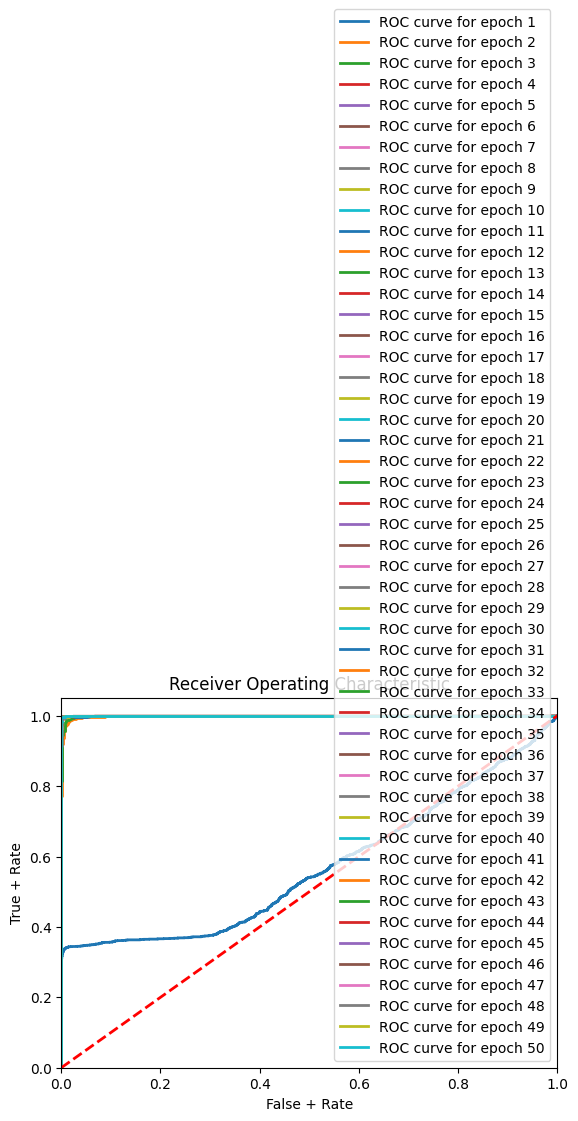

In [ ]:
# Plot ROC curves collected across all epochs

import matplotlib.pyplot as plt

plt.figure()
lw = 2
for i, (fpr, tpr) in enumerate(for_roc):
    plt.plot(fpr, tpr, lw=lw, label='ROC curve for epoch %d' % (i + 1))
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False + Rate')
plt.ylabel('True + Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("roc_curve.png")
plt.show()

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np

# Set device for inference (GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Load ResNet-50 model and modify the final classifier layer
model = models.resnet50()
num_features = model.fc.in_features
model.fc = torch.nn.Sequential(
    torch.nn.Linear(num_features, 1),
)
model.to(device)

# Load trained model weights for evaluation
model_for_test_path = '/content/gdrive/MyDrive/detect_mask/result_good_one_sssssss20250611-100327/model_epoch18.pth'
state_dict = torch.load(model_for_test_path, map_location=device)
model.load_state_dict(state_dict)
model.eval()

# Define image preprocessing (must match training transforms)
test_image_transform = transforms.Compose([
    transforms.CenterCrop(112),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
])

# Load test dataset using ImageFolder (must follow class subfolders structure)
test_image_path = "/content/gdrive/MyDrive/detect_mask/test"
test_dataset = datasets.ImageFolder(root=test_image_path, transform=test_image_transform)
test_dataloader = DataLoader(test_dataset, batch_size=40, shuffle=False)

# Print class-to-index mapping for reproducibility
print("Class mapping:", test_dataset.class_to_idx)

# Define loss function for evaluation
loss_fn = torch.nn.BCEWithLogitsLoss()

# Run inference on test set and calculate loss and accuracy
running_loss_val = 0
acc_temp_val = 0
all_labels = []
all_outputs = []

with torch.no_grad():
    for i, (img, lbl) in enumerate(tqdm(test_dataloader, desc='Test')):
        img, lbl = img.to(device), lbl.to(device).float()
        output = model(img)
        loss = loss_fn(output, lbl.unsqueeze(1))
        pred = torch.sigmoid(output) >= 0.5
        acc_temp_val += pred.eq(lbl.unsqueeze(1)).sum().item()
        batch_size = img.size(0)
        running_loss_val += loss.item() * batch_size

        all_labels.extend(lbl.cpu().numpy())
        all_outputs.extend(torch.sigmoid(output).cpu().detach().numpy())

# Print final test accuracy and loss
val_acc = acc_temp_val / len(test_dataloader.dataset)
val_loss = running_loss_val / len(test_dataloader.dataset)
print(f"Test Accuracy: {val_acc:.5f}")
print(f"Test Loss: {val_loss:.5f}")



Using device: cuda
Class mapping: {'not_wearing_mask': 0, 'wearing_mask': 1}


Test: 100%|██████████| 2/2 [00:38<00:00, 19.12s/it]

Test Accuracy: 0.70000
Test Loss: 2.11474
